# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Company Name,Competitors,Founded,Headquarters,Industry,Job Description,Job Title,Location,Rating,Revenue,...,job_state,same_state,age,spark,aws,python_yn,phd_dg,master_dg,bachelor_dg,skills
0,Carousel Industries\r\r\n3.1,-1,1992,"Exeter, RI",IT Services,"Blending customer advisory, customer support, ...",Associate Business Intelligence Data Scientist,"Exeter, RI",3.1,$500 million to $1 billion (USD),...,RI,1,28,0,0,1,0,2,1,2
1,Spring Health\r\r\n3.6,-1,2016,"New York, NY",Health Care Services & Hospitals,***Please note: All hiring and recruitment at ...,Data Scientist,"New York, NY",3.6,Unknown / Non-Applicable,...,NY,1,4,0,0,1,3,0,1,3
2,INFICON\r\r\n3.5,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",2000,"Bad Ragaz, Switzerland",Electrical & Electronic Manufacturing,JOB DESCRIPTION:\r\r\n\r\r\nDo you have a pass...,Data Scientist,"Newton, MA",3.5,$100 to $500 million (USD),...,MA,0,20,0,1,1,0,2,1,2
3,Zimmerman Advertising\r\r\n3.7,-1,1984,"Fort Lauderdale, FL",Advertising & Marketing,"Reporting to the Director, Marketing Analytics...",Business Intelligence Analyst,"Fort Lauderdale, FL",3.7,Unknown / Non-Applicable,...,FL,1,36,0,0,0,0,2,1,2
4,Intuit - Data\r\r\n4.5,"Square, PayPal, H&R Block",1983,"Mountain View, CA",Computer Hardware & Software,Intuit is seeking a Staff Data Scientist to co...,Staff Data Scientist - Analytics,"San Diego, CA",4.5,$2 to $5 billion (USD),...,CA,0,37,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'hourly',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'spark', 'aws', 'python_yn', 'phd_dg', 'master_dg',
       'bachelor_dg', 'skills'],
      dtype='object')

## Making job categories

### Simplifying & seniority parsing functions

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'engineer' in title.lower():
        return 'engineer'
    elif 'developer' in title.lower():
        return 'developer'
    elif 'lead' in title.lower():
        return 'lead'
    elif 'consultant' in title.lower():
        return 'consultant'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

## Recurrence of a given job title

In [7]:
df.job_simp.value_counts()

na                300
engineer          191
developer         178
analyst           118
manager            98
lead               40
consultant         27
data scientist     27
director           21
Name: job_simp, dtype: int64

## Recurrence of seniority level researched

In [8]:
## Job title and seniority 
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        719
senior    278
jr          3
Name: seniority, dtype: int64

## Fixing the state column
As we can see below, some cells from de Location column are not formatted as the other ones. We need to fix : 'Utah', 'New Jersey', 'United State', 'Greenwood Village'.

In [9]:
##  Fix state
df.job_state.unique()

array([' RI', ' NY', ' MA', ' FL', ' CA', ' WA', ' MD', ' MN', ' TX',
       ' CO', ' DC', ' IL', ' NJ', ' AZ', 'Utah', ' VA', 'New Jersey',
       'United States', ' UT', ' NE', ' NC', ' MO', ' CT', ' KY', ' PA',
       ' TN', ' SC', ' WI', ' MI', ' GA', ' OH', ' AL', ' LA',
       'Greenwood Village', ' VT', ' OK', ' NM', ' IA', ' KS', ' OR'],
      dtype=object)

### State simplifier function

In [10]:
#Making every names a state abreviation
def state_simplifier(state):
    if  'utah' in state.lower():
        return 'UT'
    elif 'new jersey' in state.lower():
        return 'NJ'
    elif 'greenwood village' in state.lower():
        return 'CO'
    elif 'united state' in state.lower():
        return 'US'
    else :
        return state
df['job_state'] = df.job_state.apply(state_simplifier)

When I cleaned the data previously, I forgot to get rid of the useless space. I get rid of it with the lambda function as below.

In [11]:
#getting rid of the spaces
df['job_state'] = df.job_state.apply(lambda x: x.replace(' ',''))

In [12]:
df.job_state.unique()

array(['RI', 'NY', 'MA', 'FL', 'CA', 'WA', 'MD', 'MN', 'TX', 'CO', 'DC',
       'IL', 'NJ', 'AZ', 'UT', 'VA', 'US', 'NE', 'NC', 'MO', 'CT', 'KY',
       'PA', 'TN', 'SC', 'WI', 'MI', 'GA', 'OH', 'AL', 'LA', 'VT', 'OK',
       'NM', 'IA', 'KS', 'OR'], dtype=object)

## Recurrence of a given State

In [13]:
df.job_state.value_counts()

TX    137
CA    124
NY    121
VA     66
NC     61
AZ     59
DC     44
CO     35
FL     28
PA     23
RI     22
WI     22
NE     21
IL     21
KY     21
MD     20
KS     18
VT     18
SC     17
MO     17
MI     15
MA     15
NJ     14
GA     11
MN      8
US      5
UT      5
OK      5
OH      4
AL      4
IA      4
TN      3
CT      3
WA      3
NM      2
LA      2
OR      2
Name: job_state, dtype: int64

## Making a column holding the lenght of the description

In [14]:
##  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      5434
1      5259
2      3413
3      2978
4       456
5      5207
6      5360
7      2760
8      2149
9      4909
10     5470
11     3585
12     3346
13      399
14     3409
15     3657
16     2866
17     4517
18     3957
19     4255
20     2692
21     3664
22     2558
23     7021
24     3316
25     2797
26     4074
27     3958
28     3175
29     2712
       ... 
970    2645
971    3980
972    2334
973    2338
974    4731
975    3827
976    1409
977    4775
978    3732
979    2856
980    1002
981    3158
982    3076
983    3263
984    4574
985    7016
986    4338
987    3477
988    5091
989    4912
990    2120
991    1203
992    5181
993    1325
994    6104
995     824
996    2473
997    3509
998    2211
999    1187
Name: desc_len, Length: 1000, dtype: int64

## Making a column holding the number of competitor to a given company
Checking if the function went as planned.

In [15]:
##  Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df[['Competitors','num_comp']]

,Competitors,num_comp
0,-1,0
1,-1,0
2,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",3
3,-1,0
4,"Square, PayPal, H&R Block",3
5,-1,0
6,"Oak Ridge National Laboratory, National Renewa...",3
7,"Colony Specialty, Markel, RLI",3
8,-1,0
9,-1,0


## Making the hourly cells as a annual salary

In [16]:
## hourly wage to annual 
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

taking the hourly salary and multiplying it by 2 almost give the anual salary when taking the 'k' off.

In [17]:
df[['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,0,53,89
1,0,53,89
2,0,53,89
3,0,53,89
4,0,53,89
5,0,53,89
6,0,53,89
7,0,53,89
8,0,53,89
9,0,53,89


## Simplifying the job title

In [18]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\r\r\n',''))
df['company_txt']

0                        Carousel Industries
1                              Spring Health
2                                    INFICON
3                      Zimmerman Advertising
4                              Intuit - Data
5                                   Novartis
6      Pacific Northwest National Laboratory
7                              IFG Companies
8                          Remedi SeniorCare
9                                     Ecolab
10                             Spring Health
11                          Dun & Bradstreet
12                                  GutCheck
13                                  Powertek
14                    MIT Lincoln Laboratory
15                                    Ecolab
16                   Plymouth Rock Assurance
17                           Berkeley Lights
18                             Tivity Health
19                                     Zynga
20                        Via Transportation
21                              Merrick Bank
22        

In [19]:
df.describe()

,Founded,Rating,hourly,min_salary,max_salary,avg_salary,same_state,age,spark,aws,python_yn,phd_dg,master_dg,bachelor_dg,skills,desc_len,num_comp
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1764.986000,3.689300,0.064000,47.238000,92.094000,67.874000,0.178000,36.638000,0.032000,0.260000,0.1020,0.030000,0.608000,0.521000,0.969000,3247.095000,1.837000
std,615.017773,0.596667,0.244875,16.866708,32.214079,24.615362,0.382704,20.960207,0.176088,0.438854,0.3028,0.298646,0.920426,0.499809,0.828689,1536.532433,1.445864
min,-1.000000,2.200000,0.000000,28.000000,68.000000,28.000000,0.000000,-1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,162.000000,0.000000
25%,1967.000000,3.300000,0.000000,40.000000,72.000000,56.000000,0.000000,20.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,2213.000000,0.000000
50%,1967.000000,3.300000,0.000000,40.000000,77.000000,56.000000,0.000000,53.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,1.000000,3099.500000,3.000000
75%,1989.000000,4.000000,0.000000,54.000000,102.000000,78.500000,0.000000,53.000000,0.000000,1.000000,0.0000,0.000000,2.000000,1.000000,2.000000,4266.000000,3.000000
max,2016.000000,5.000000,1.000000,119.000000,203.000000,136.000000,1.000000,179.000000,1.000000,1.000000,1.0000,3.000000,2.000000,1.000000,3.000000,8569.000000,3.000000


In [20]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'hourly',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'spark', 'aws', 'python_yn', 'phd_dg', 'master_dg',
       'bachelor_dg', 'skills', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

## Analysing how different columns can evolve

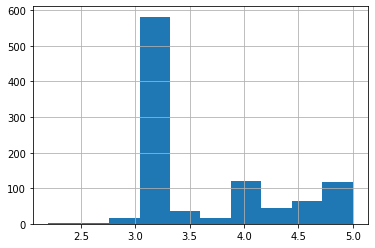

In [21]:
df.Rating.hist()

The majority of the collected data have been rated as a 3 stars.

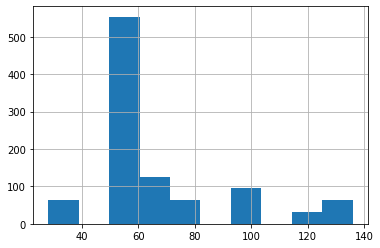

In [22]:
df.avg_salary.hist()

The majority of the jobs collected are paid around 50K annually, but some can get more than the double of it. The data is quite spread out.

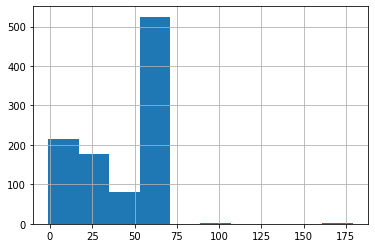

In [23]:
df.age.hist()

Most of the age collected data is within a range of 75 years.

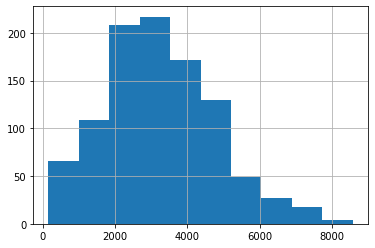

In [24]:
df.desc_len.hist()

The job descriptions are quite homogeneous.

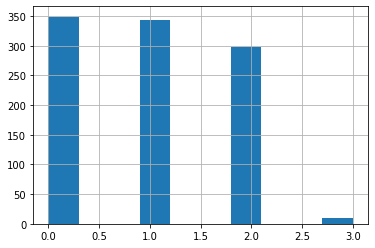

In [25]:
df.skills.hist()

From the one hot encoding i made (Bachelor, Master, PhD) we can see that most of the jobs requier at most a Master and even only years of experiences in the field are needed. In the other hand, PhD doesnt seem to be a must have degree for most of the job collected.

## Getting a better idea of how values are spread within a columns

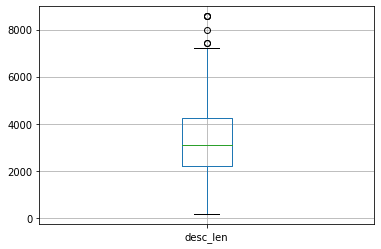

In [26]:
df.boxplot(column = ['desc_len'])

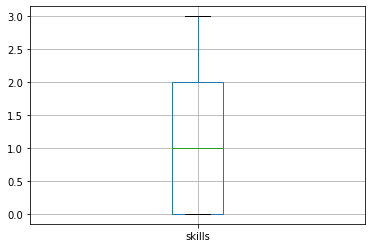

In [27]:
df.boxplot(column = ['skills'])

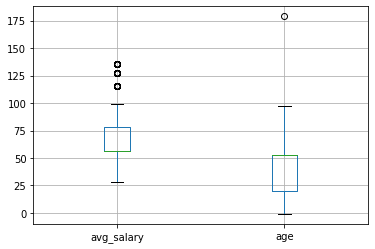

In [28]:
df.boxplot(column = ['avg_salary','age'])

## Correlation between numerical Data

In [29]:
df[['age','avg_salary','Rating','desc_len','num_comp','skills']].corr()

,age,avg_salary,Rating,desc_len,num_comp,skills
age,1.000000,0.049491,-0.646953,0.132438,0.740901,0.000102
avg_salary,0.049491,1.000000,-0.067548,0.018639,0.042454,0.030184
Rating,-0.646953,-0.067548,1.000000,-0.104621,-0.461856,0.113508
desc_len,0.132438,0.018639,-0.104621,1.000000,0.165485,0.273298
num_comp,0.740901,0.042454,-0.461856,0.165485,1.000000,-0.065209
skills,0.000102,0.030184,0.113508,0.273298,-0.065209,1.000000


We get interesting values from this correlation data frame :
        * The skills requiered seem to be linked to the rating of the company.
        * The skills requiered are strongly corrolated to the job description.
        * The number of competitor is highly corolated with the age of the company.
        * The number of competitor seems to have a negative correlation with the rating.
        * The number of competitor also seems to have some link with the average salary and the description length
        * The rating seems to have a highly negative correlation with the age of the company

We should take good care of the description as a feature for our model. When I think about the correlation between the description and the skills requiered. I can understand that, the most the job is desccribed, the most the compagnies are willing to give a precise profil of the person they are looking for. I m scared that putting the description length as a feature would make a target leakage. The goal is to predict what level of skill will be requiered for a given job. So, in theory we wouldn't have the description yet.

## Making a heatmap to highlight the correlations

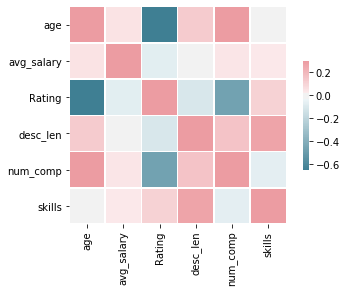

In [30]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp','skills']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'hourly',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'spark', 'aws', 'python_yn', 'phd_dg', 'master_dg',
       'bachelor_dg', 'skills', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

## Correlation between categorical data

In [32]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Sector','Industry',
    'Revenue', 'company_txt', 'job_state','same_state','spark','aws','python_yn',
    'job_simp','seniority']]

graph for Location : total = 156


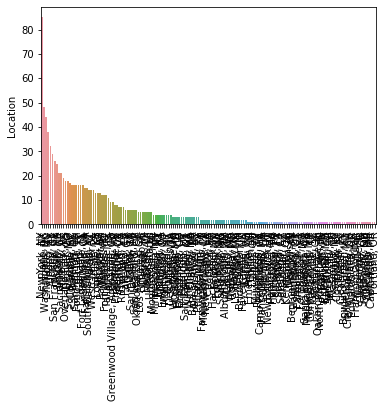

graph for Headquarters : total = 77


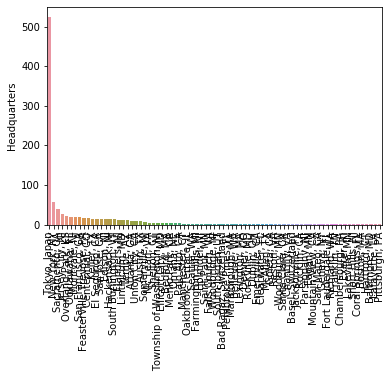

graph for Size : total = 8


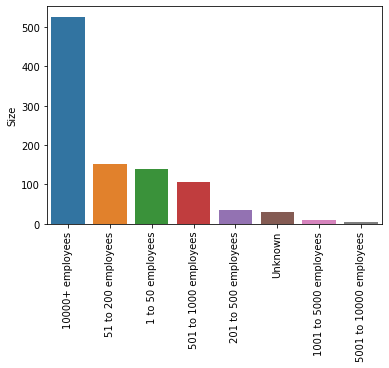

graph for Type of ownership : total = 6


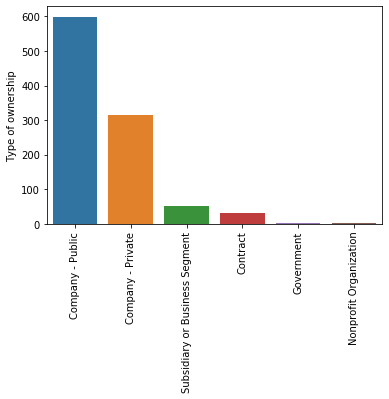

graph for Sector : total = 15


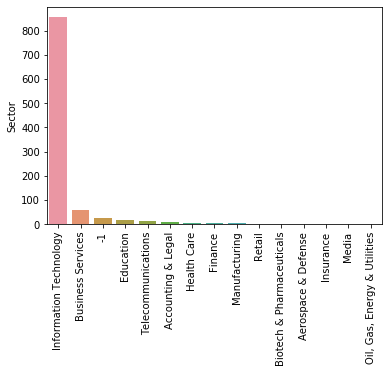

graph for Industry : total = 25


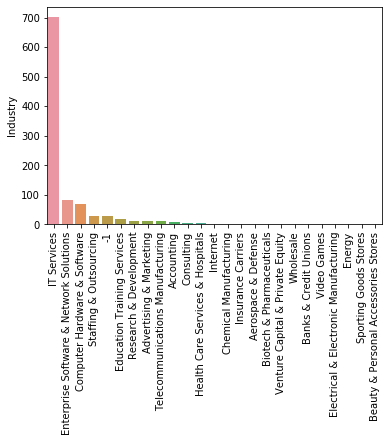

graph for Revenue : total = 12


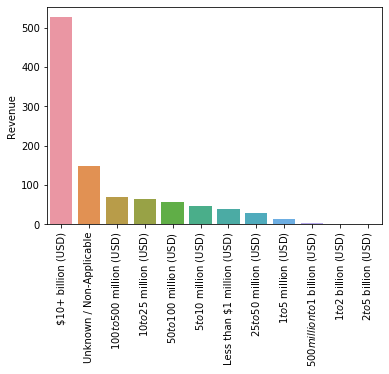

graph for company_txt : total = 98


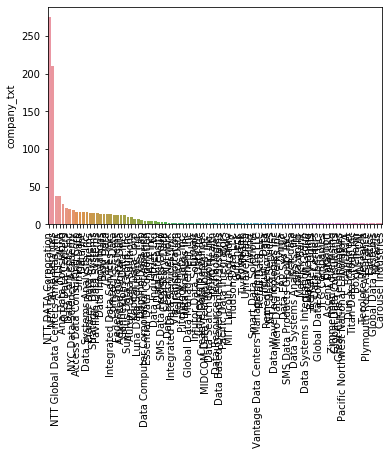

graph for job_state : total = 37


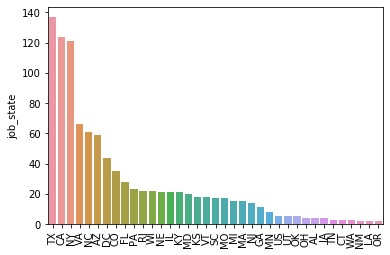

graph for same_state : total = 2


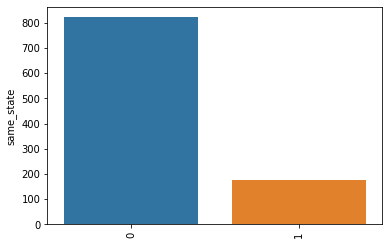

graph for spark : total = 2


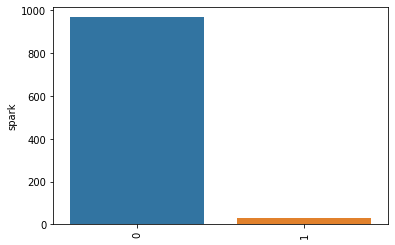

graph for aws : total = 2


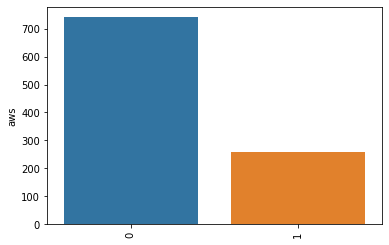

graph for python_yn : total = 2


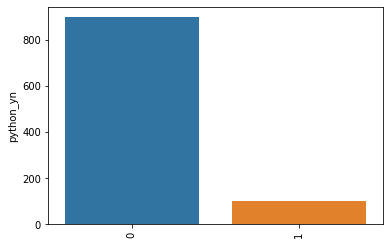

graph for job_simp : total = 9


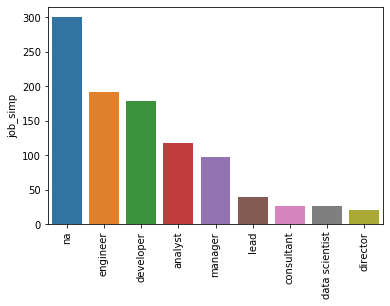

graph for seniority : total = 3


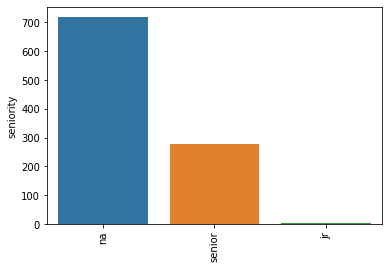

In [33]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s : total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## Making a top 20 of the hardly readable categorical data

graph for Location : Top 20


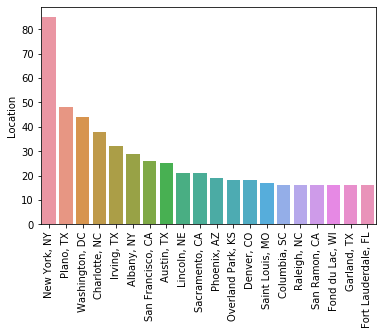

graph for Headquarters : Top 20


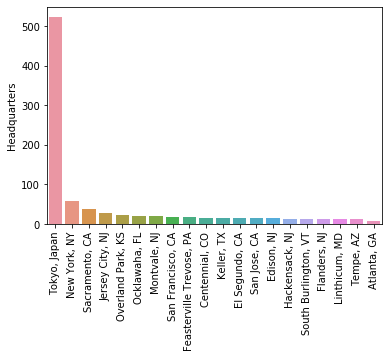

graph for company_txt : Top 20


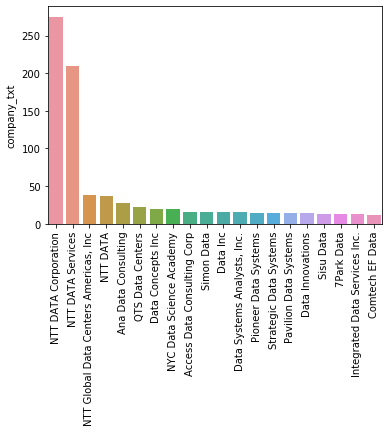

In [34]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s : Top %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [35]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'hourly',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'spark', 'aws', 'python_yn', 'phd_dg', 'master_dg',
       'bachelor_dg', 'skills', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

## Making pivot table for a better understanding of the correlation between categorical data

### Correlation between the job and the skill level
Data scientist seems to be the job requiring the highest skill level.

In [36]:
pd.pivot_table(df, index = 'job_simp', values = "skills")

,skills
job_simp,
analyst,1.432203
consultant,1.000000
data scientist,1.666667
developer,0.623596
director,0.476190
engineer,0.916230
lead,1.050000
manager,1.275510
na,0.883333


In [37]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

### Pivot Table linking the state need for type of job and competence

In [38]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = "skills").sort_values('job_state',ascending = False)

skills
job_state job_simp                
WI        na              2.000000
          engineer        1.000000
          consultant      1.500000
          analyst         1.000000
WA        manager         0.000000
          data scientist  3.000000
VT        developer       1.000000
          engineer        2.000000
          lead            1.000000
VA        na              1.000000
          manager         1.000000
          lead            1.000000
          engineer        0.333333
          developer       0.000000
          data scientist  2.000000
          analyst         1.714286
UT        data scientist  2.000000
          na              1.000000
US        data scientist  1.000000
          consultant      2.000000
          na              0.000000
TX        developer       0.250000
          na              1.352941
          manager         1.000000
          lead            0.888889
          engineer        0.555556
          data scientist  2.500000
          analyst         1.250000
TN        na              1.333333
SC        engineer        0.000000
          developer       0.666667
          analyst         0.000000
          manager         2.000000
          na              1.142857
RI        data scientist  2.000000
          lead            1.000000
          na              0.100000
PA        na              1.928571
          lead            2.000000
          director        1.000000
          developer       1.000000
          analyst         0.000000
OR        na              2.000000
          analyst         1.000000
OK        na              0.000000
OH        na              2.000000
          engineer        2.000000
          developer       0.000000
NY        data scientist  1.000000
          director        0.000000
          analyst         1.750000
          developer       0.619048
          engineer        0.947368
          manager         0.666667
          na              1.060606
NM        developer       2.000000
NJ        developer       0.000000
          data scientist  2.500000
          analyst         1.800000
          engineer        0.000000
          na              1.250000
NE        na              0.052632
          manager         0.500000
NC        na              0.409091
          manager         1.000000
          lead            0.666667
          director        2.000000
          developer       0.666667
          consultant      1.000000
          analyst         1.200000
MO        manager         2.000000
          engineer        1.000000
          lead            1.000000
          developer       2.000000
MN        lead            0.000000
          engineer        0.000000
          analyst         2.000000
          na              1.000000
MI        na              0.222222
          manager         0.000000
          lead            1.000000
          engineer        1.000000
          consultant      1.000000
MD        na              0.000000
          lead            1.000000
          engineer        1.187500
          analyst         0.000000
MA        analyst         1.750000
          engineer        1.500000
          data scientist  2.000000
          manager         0.500000
          na              1.250000
LA        manager         0.000000
          engineer        1.000000
KY        lead            2.000000
          analyst         1.333333
          engineer        0.333333
          developer       0.200000
          manager         1.500000
          na              0.333333
KS        na              1.000000
          manager         1.000000
          analyst         1.000000
IL        na              0.062500
          manager         2.000000
          engineer        1.000000
          data scientist  2.000000
IA        developer       2.000000
GA        engineer        1.000000
          consultant      0.333333
          lead            0.000000
          na              1.000000
FL        na              0.000000
   

### Directly linking the state to its competence need

In [39]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = "skills").sort_values('skills',ascending = False)

,skills
job_state,
WA,3.0
NJ,2.5
TX,2.5
CA,2.0
IL,2.0
MA,2.0
RI,2.0
UT,2.0
VA,2.0


In [40]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'hourly',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'spark', 'aws', 'python_yn', 'phd_dg', 'master_dg',
       'bachelor_dg', 'skills', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

### Making pivot table for each categorical data and their link with the skills column

In [41]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp',
                'hourly', 'python_yn', 'spark', 'aws', 'Type of ownership',
                'avg_salary','skills']]

In [42]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i, values = 'skills').sort_values('skills',ascending = False))

Rating
          skills
Rating          
4.3     3.000000
4.1     2.125000
2.2     2.000000
3.6     1.857143
4.2     1.833333
3.7     1.800000
4.8     1.760870
3.8     1.750000
4.6     1.250000
3.1     1.235294
4.4     1.192308
3.2     1.000000
3.5     1.000000
3.9     0.935065
4.9     0.916667
3.3     0.877737
3.0     0.857143
4.7     0.833333
4.5     0.789474
3.4     0.781250
5.0     0.702128
2.9     0.500000
4.0     0.285714
2.8     0.000000
2.5     0.000000
Industry
                                           skills
Industry                                         
Energy                                   3.000000
Sporting Goods Stores                    3.000000
Video Games                              3.000000
Internet                                 2.666667
Chemical Manufacturing                   2.500000
Biotech & Pharmaceuticals                2.500000
Insurance Carriers                       2.000000
Electrical & Electronic Manufacturing    2.000000
Banks & Credit Unions    

ValueError: Grouper for 'skills' not 1-dimensional

### The need of python mastery, depending of the revenu of the company

In [43]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'skills', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),1.0,1.0
$1 to $5 million (USD),7.0,6.0
$10 to $25 million (USD),57.0,8.0
$10+ billion (USD),490.0,37.0
$100 to $500 million (USD),68.0,1.0
$2 to $5 billion (USD),1.0,NaN
$25 to $50 million (USD),27.0,1.0
$5 to $10 million (USD),44.0,4.0
$50 to $100 million (USD),41.0,16.0


## Making a WordCloud using the collected description
the output ll be the most used words within the collected data

In [44]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

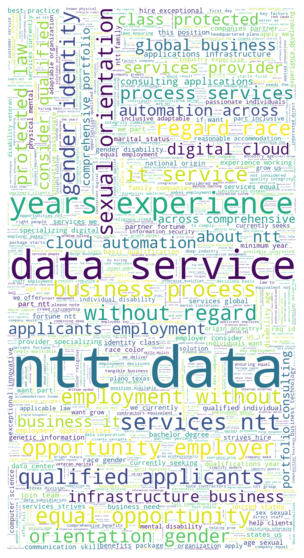

In [45]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.to_csv('eda_data.csv', index = False)